This notebook was used for some visualizations before the counts data was obtained from Maria.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy.stats import mannwhitneyu, shapiro, normaltest

# read the data

In [10]:
PATH = "../data/refine.bio/"
microarray = pd.read_csv(PATH + "microarray.csv", index_col=0)
rnaseq = pd.read_csv(PATH + "rnaseq.csv", index_col=0)
ours = pd.read_csv("../data/ours_maria_version/genes.csv", index_col=0)

In [11]:
print(microarray.shape)
print(rnaseq.shape)
print(ours.shape)

(247, 20059)
(163, 43366)
(280, 14180)


In [12]:
rnaseq.isna().sum().any()

False

## head

In [13]:
microarray.head()

,human,region,is_control,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000283307,ENSG00000283597,ENSG00000283632,ENSG00000283703,ENSG00000283709,ENSG00000283849,ENSG00000283945,ENSG00000284048,ENSG00000284309,ENSG00000284543
GSM439778,S014_Scz_M_74,BA10,0,1.448569,-0.001471,9.000389,0.575834,-0.081877,0.909567,0.485215,...,0.398692,0.102587,1.941111,0.236185,2.408422,0.334848,0.061013,-0.193307,0.213981,0.859307
GSM439779,C017_Control_M_72,BA10,1,1.547945,-0.096677,10.525544,0.947314,0.050933,1.039868,1.147053,...,0.531480,0.111803,1.635247,0.277716,1.733994,0.201200,0.144816,-0.160775,0.276903,0.756167
GSM439780,C011_Control_F_89,BA10,1,2.044714,-0.070425,10.354863,0.739052,-0.059632,0.929071,1.624510,...,0.413677,0.016422,2.193743,0.332062,1.588256,0.402333,0.077335,-0.166745,0.351504,0.755419
GSM439781,S017_Scz_F_85,BA10,0,1.402853,-0.030728,10.128362,0.807083,-0.086455,1.062902,0.839434,...,0.513321,0.138528,1.862529,0.297130,1.775727,0.340995,0.029836,-0.200705,0.436485,0.864911
GSM439782,C013_Control_M_61,BA10,1,0.983013,-0.071798,9.631223,0.502486,-0.108668,0.823590,1.221449,...,0.555014,0.151806,2.129795,0.382301,2.108699,0.430916,0.051561,-0.217781,0.162355,0.808082


In [14]:
rnaseq.head()

,human,region,is_control,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000286262,ENSG00000286263,ENSG00000286264,ENSG00000286265,ENSG00000286266,ENSG00000286268,ENSG00000286269,ENSG00000286270,ENSG00000286271,ENSG00000286272
SRR3438555,X1834_control,Cingulate Anterior,1,1.942959,-0.048304,2.104093,2.324989,1.378368,1.922795,2.202207,...,-0.048304,0.599989,2.787198,-0.048304,0.985860,0.496252,2.780853,-0.048304,0.861214,1.428780
SRR3438559,X2353_schizophrenia,56 Nucleus Accumbens,0,2.399769,0.270970,2.226805,2.204324,1.501263,2.563732,3.239068,...,-0.046871,0.464062,3.686122,-0.046871,1.105357,0.680343,2.549532,0.311412,1.024190,1.547774
SRR3438560,X2664_control,56 Nucleus Accumbens,1,2.177106,-0.051191,2.198438,2.362276,1.721814,1.548758,2.025757,...,-0.051191,0.151359,3.367909,-0.051191,1.241474,0.564202,2.302717,0.242799,0.775214,1.310010
SRR3438561,X2805_control,56 Nucleus Accumbens,1,2.681150,0.086147,2.105902,2.245252,1.474583,2.027043,1.865736,...,0.155626,0.197531,3.360096,0.263979,1.192620,0.533281,2.297624,0.203276,0.639282,1.543373
SRR3438562,X2976_schizophrenia,56 Nucleus Accumbens,0,2.197950,0.210492,2.116410,2.264167,1.500013,1.805623,2.133254,...,-0.047541,0.299811,3.588706,-0.047541,1.133778,0.748311,1.976020,0.202908,0.480480,1.359628


In [15]:
ours.head()

,human,region,is_control,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000283765,ENSG00000284024,ENSG00000284194,ENSG00000284292,ENSG00000284308,ENSG00000284341,ENSG00000284479,ENSG00000284505,ENSG00000284512,ENSG00000284691
0,HA,1 Cerebellar Grey Matter,1,-0.596049,0.141666,-0.267044,-0.661620,-1.023894,-0.762093,-0.151804,...,-0.284310,-0.620350,-0.945761,-1.747471,-0.463782,-1.080750,-1.318549,-0.782920,-2.027809,-0.563310
1,HA,15 1ary Motor (BA4),1,-0.317893,0.136090,-0.528817,-1.106894,-0.629645,-0.401154,0.004785,...,-0.656352,-0.912935,-0.855248,-1.093126,-0.368197,-0.402339,-1.343430,-0.754116,-1.293022,0.459234
2,HA,16 1ary Auditory (BA41/42),1,-0.383780,0.220198,-0.446192,-1.061985,-0.765968,-0.571556,0.011798,...,-0.061832,-0.788491,-0.713770,-1.251902,-0.268735,-2.379126,0.006324,-0.678809,-1.371943,-0.243236
3,HA,17 1ary Visual Anterior (BA17a),1,-0.407656,0.241953,-0.485536,-1.129223,-0.931815,-0.523907,-0.039029,...,-0.474113,-0.724664,-0.898585,-0.454411,-0.384277,-2.420034,0.217227,-0.441917,-1.253151,0.477616
4,HA,18 1ary Somatosensory (BA3/1/2),1,-0.217254,0.219317,-0.455956,-1.025259,-0.856438,0.026612,-0.018152,...,-0.829870,-0.715136,-1.093177,-1.066396,-0.482353,-2.509890,-1.446660,-0.911031,-1.155920,-0.251482


## value counts

In [16]:
microarray.region.value_counts()

BA46                                                 89
BA10                                                 50
superior temporal cortex (Brodmann Area 22, BA22)    39
Associative striatum                                 36
hippocampus                                          33
Name: region, dtype: int64

In [17]:
rnaseq.region.value_counts()

34 Dorsolateral Prefrontal (BA9)    56
Cingulate Anterior                  55
56 Nucleus Accumbens                52
Name: region, dtype: int64

In [18]:
ours.region.value_counts()

1  Cerebellar Grey Matter                    8
58 Putamen                                   8
52 Amygdala                                  8
53 Insular Posterior Cortex                  8
54 Entorhinal Cortex                         8
55 Hippocampus, CA3 / Dentate Gyrus          8
56 Nucleus Accumbens                         8
57 Caudate                                   8
63 Substantia Nigra                          8
49 Cingulate Anterior (BA32)                 8
64 Globus Pallidus                           8
68 Medial Dorsal Thalamus                    8
69 Hypothalamus                              8
72 Internal Capsule                          8
73 Corpus Callosum Anterior                  8
74 Corpus Callosum Posterior                 8
50 Orbitofrontal (BA11)                      8
48 Cingulate Anterior (BA24)                 8
15 1ary Motor (BA4)                          8
30 Premotor Anterior Lateral (BA6a)          8
16 1ary Auditory (BA41/42)                   8
17 1ary Visua

In [19]:
pd.DataFrame(rnaseq[["region", "is_control"]].value_counts())

0
region                           is_control    
34 Dorsolateral Prefrontal (BA9) 0           28
                                 1           28
Cingulate Anterior               1           28
56 Nucleus Accumbens             1           27
Cingulate Anterior               0           27
56 Nucleus Accumbens             0           25

In [20]:
pd.DataFrame(microarray[["region", "is_control"]].value_counts())

0
region                                            is_control    
BA46                                              1           47
                                                  0           42
BA10                                              0           28
                                                  1           22
superior temporal cortex (Brodmann Area 22, BA22) 0           22
Associative striatum                              0           18
                                                  1           18
hippocampus                                       1           18
superior temporal cortex (Brodmann Area 22, BA22) 1           17
hippocampus                                       0           15

# Comparing genes

In [21]:
region_nm = "56 Nucleus Accumbens"

In [22]:
our_region = ours[ours.region == region_nm]
their_region = rnaseq[rnaseq.region == region_nm]

In [23]:
random_genes = np.random.choice(our_region.columns, 10)

In [24]:
for i in range(len(random_genes)):
    random_gene = random_genes[i]

    our_distr = our_region.loc[our_region.is_ill, random_gene].values
    their_distr = their_region.loc[their_region.is_ill, random_gene].values
#     print(mannwhitneyu(our_distr, their_distr))

    qqplot_2samples(our_distr, their_distr)
    plt.show()


AttributeError: 'DataFrame' object has no attribute 'is_ill'

## normality test

In [ ]:
for is_ill in [0, 1]:
    for region in microarray.region.unique():
        microarray.loc[(microarray.is_ill == is_ill) & (microarray.region == region)]

        data = microarray.loc[(microarray.is_ill == is_ill) & (microarray.region == region)].values[:, 2:-1].astype(float)
        if data.shape[0] > 0:
            print(is_ill, region, (normaltest(data).pvalue < .05 / data.shape[0]).mean())

Not everything is normal even with Bonferroni correction

# per sample distributions

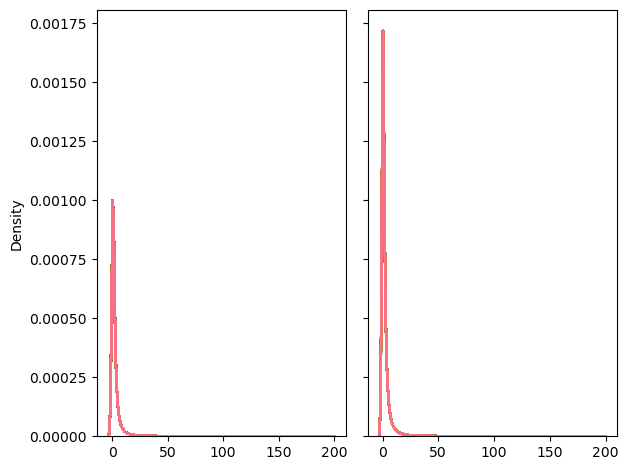

In [25]:
fig, axs = plt.subplots(1, 2, sharey=True)
sns.kdeplot(data=microarray.iloc[:, 3:].values.T, ax=axs[0], legend=False)
sns.kdeplot(data=rnaseq.iloc[:, 3:].values.T, ax=axs[1], legend=False)
plt.tight_layout()

In [26]:
common_genes = list(set(microarray.columns) & set(rnaseq.columns) & set(ours.columns) - set(ours.columns[:3]))

# common_genes = common_genes[:500]

In [27]:
reference_distr = pd.read_csv("../data/refine.bio/reference_distr.tsv", sep="\t", header=None)

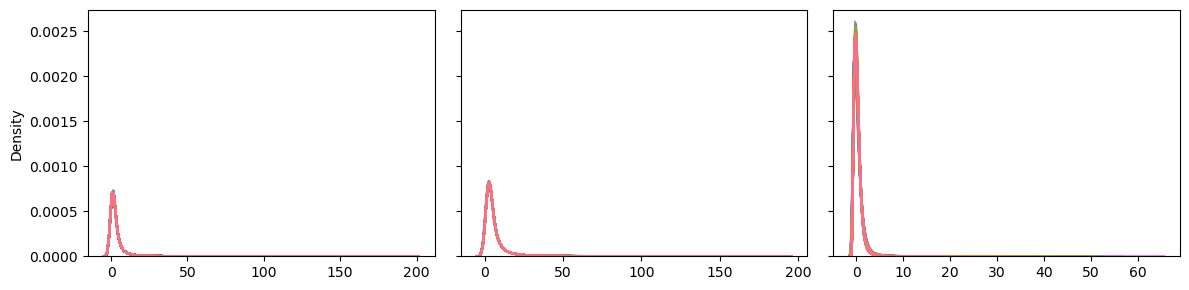

In [28]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(4*3, 3))
sns.kdeplot(data=microarray[common_genes].values.T, ax=axs[0], legend=False)
sns.kdeplot(data=rnaseq[common_genes].values.T, ax=axs[1], legend=False)
sns.kdeplot(data=np.exp(ours[common_genes].T.dropna().values) - 1, ax=axs[2], legend=False)
plt.tight_layout()

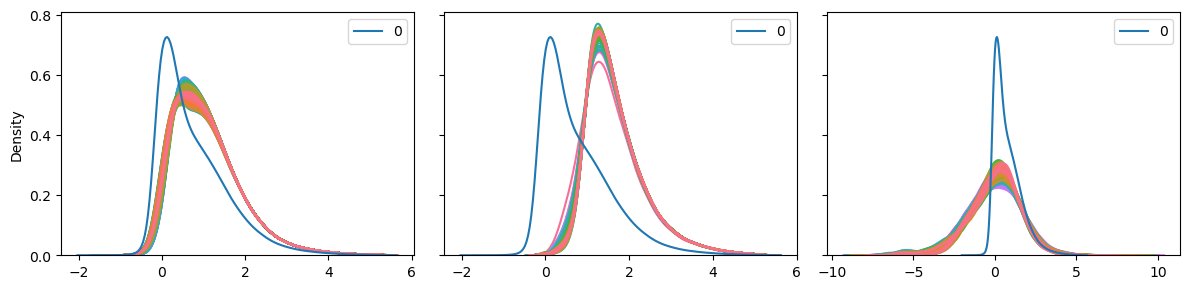

In [29]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(4*3, 3))

sns.kdeplot(
    data=np.log1p(microarray[common_genes].values.T), ax=axs[0], legend=False,
    common_norm=False,
)
sns.kdeplot(np.log1p(reference_distr), ax=axs[0])

sns.kdeplot(
    data=np.log1p(rnaseq[common_genes].values.T), ax=axs[1], legend=False,
    common_norm=False,
)
sns.kdeplot(np.log1p(reference_distr), ax=axs[1])

sns.kdeplot(
    data=np.log(10) * ours[common_genes].T.dropna().values, ax=axs[2], legend=False,
    common_norm=False,
)
sns.kdeplot(np.log1p(reference_distr), ax=axs[2])

plt.tight_layout()

<AxesSubplot:ylabel='Density'>

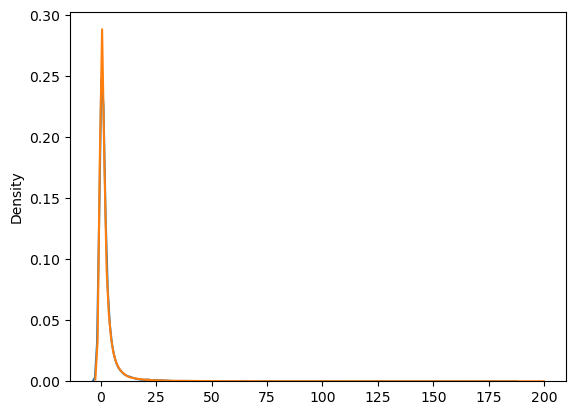

In [30]:
sns.kdeplot(microarray.iloc[:, 3:].values.mean(axis=0))
sns.kdeplot(rnaseq.iloc[:, 3:].values.mean(axis=0))

In [31]:
microarray.iloc[:, 3:].mean().quantile(.05)

-0.11206619574183778

In [32]:
rnaseq.iloc[:, 3:].mean().quantile(.05)

-0.042704113539659194

In [38]:
microarray.shape

(247, 20059)

In [39]:
rnaseq.shape

(163, 43366)

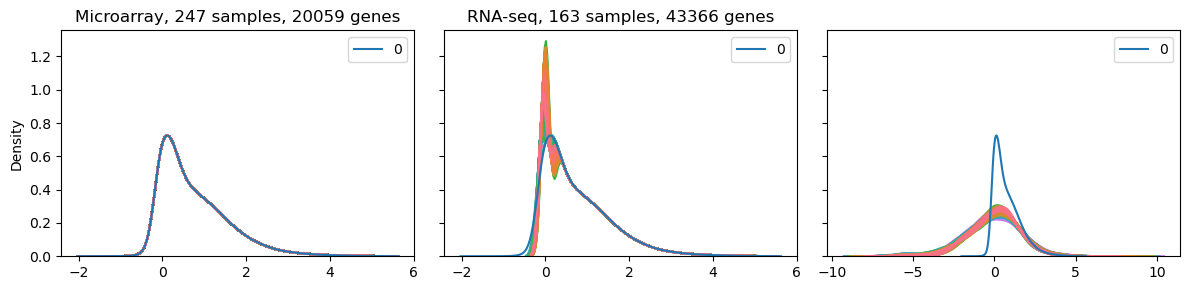

In [42]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(4*3, 3))

sns.kdeplot(
    data=np.log1p(microarray.iloc[:, 3:].values.T), ax=axs[0], legend=False,
    common_norm=False,
)
sns.kdeplot(np.log1p(reference_distr), ax=axs[0], label="reference distribution")
axs[0].set_title("Microarray, 247 samples, 20059 genes")

sns.kdeplot(
    data=np.log1p(rnaseq.iloc[:, 3:].values.T), ax=axs[1], legend=False,
    common_norm=False,
)
sns.kdeplot(np.log1p(reference_distr), ax=axs[1], label="reference distribution")
axs[1].set_title("RNA-seq, 163 samples, 43366 genes")

sns.kdeplot(
    data=np.log(10) * ours.iloc[:, 3:].values.T, ax=axs[2], legend=False,
    common_norm=False,
)
sns.kdeplot(np.log1p(reference_distr), ax=axs[2])

plt.tight_layout()

In [43]:
len(common_genes_refine_bio)

19479

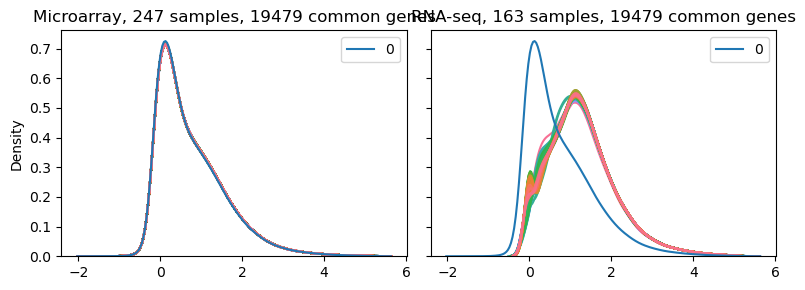

In [44]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(4*2, 3))
common_genes_refine_bio = list(set(microarray.columns) & set(rnaseq.columns) - set(ours.columns[:3]))

sns.kdeplot(
    data=np.log1p(microarray[common_genes_refine_bio].values.T), ax=axs[0], legend=False,
    common_norm=False,
)
sns.kdeplot(np.log1p(reference_distr), ax=axs[0], label="reference distribution")
axs[0].set_title("Microarray, 247 samples, 19479 common genes")

sns.kdeplot(
    data=np.log1p(rnaseq[common_genes_refine_bio].values.T), ax=axs[1], legend=False,
    common_norm=False,
)
sns.kdeplot(np.log1p(reference_distr), ax=axs[1], label="reference distribution")
axs[1].set_title("RNA-seq, 163 samples, 19479 common genes")

plt.tight_layout()

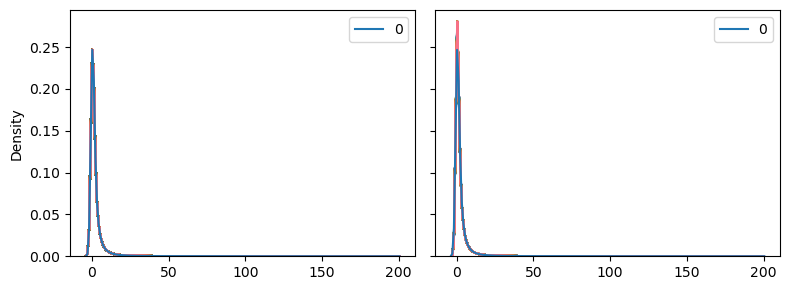

In [37]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(4*2, 3))

sns.kdeplot(
    data=(microarray.iloc[:, 3:].values.T), ax=axs[0], legend=False,
    common_norm=False,
)
sns.kdeplot((reference_distr), ax=axs[0])

sns.kdeplot(
    data=(rnaseq.iloc[:, 3:].values.T), ax=axs[1], legend=False,
    common_norm=False,
)
sns.kdeplot((reference_distr), ax=axs[1])

plt.tight_layout()